In [1]:
from createFeatures import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = create_features()
df

MySQL Database connection successful
Fetch all successful
Fetch all successful
	Closed connection


,census_tract_id,LILATract_1And10,state,county,num_restaurants,min_calories,max_calories,mean_calories,min_protein,max_protein,...,mean_carbs,num_price_level_1,num_price_level_2,num_price_level_3,num_price_level_4,num_rating_less_2,num_rating_2_to_4,num_rating_great_4,avg_rating_total,total_ratings_count
0,34001000200,0,New Jersey,Atlantic County,28,350.00,509.67,402.609286,14.00,22.86,...,33.872500,9,13,5,1,0,28,19,4.210714,17654.0
1,34001000300,0,New Jersey,Atlantic County,31,271.38,509.67,400.042903,10.75,22.86,...,33.805484,10,14,5,2,0,31,22,4.203226,40403.0
2,34001001100,0,New Jersey,Atlantic County,27,174.50,477.00,372.790370,3.50,23.11,...,33.227778,12,8,5,2,0,27,21,4.211111,50402.0
3,34001001200,0,New Jersey,Atlantic County,26,153.00,478.40,380.088846,3.00,24.60,...,32.425769,9,10,4,3,0,26,17,4.126923,36480.0
4,34001001400,0,New Jersey,Atlantic County,15,358.40,483.00,403.232667,11.70,27.29,...,30.140667,1,7,6,1,0,15,8,4.113333,13785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,34007602902,0,New Jersey,Camden County,15,236.00,438.56,355.130667,6.00,20.44,...,34.642667,12,3,0,0,0,15,9,4.166667,5630.0
66,34007603001,0,New Jersey,Camden County,30,236.00,557.67,378.801333,6.00,24.89,...,34.410333,24,6,0,0,0,30,18,4.060000,10328.0
67,34007603002,0,New Jersey,Camden County,28,236.00,557.67,394.370357,6.00,26.00,...,34.313571,24,4,0,0,0,28,17,4.032143,10907.0
68,34007603100,0,New Jersey,Camden County,18,258.78,514.22,367.707222,7.50,24.89,...,34.932222,13,5,0,0,0,18,9,4.016667,8794.0


In [3]:
df.keys()

Index(['census_tract_id', 'LILATract_1And10', 'state', 'county',
       'num_restaurants', 'min_calories', 'max_calories', 'mean_calories',
       'min_protein', 'max_protein', 'mean_protein', 'min_fat', 'max_fat',
       'mean_fat', 'min_carbs', 'max_carbs', 'mean_carbs', 'num_price_level_1',
       'num_price_level_2', 'num_price_level_3', 'num_price_level_4',
       'num_rating_less_2', 'num_rating_2_to_4', 'num_rating_great_4',
       'avg_rating_total', 'total_ratings_count'],
      dtype='object')

In [193]:
target = 'LILATract_1And10'
# features = ['num_restaurants', 'min_calories', 'max_calories', 'mean_calories',
#        'min_protein', 'max_protein', 'mean_protein', 'min_fat', 'max_fat',
#        'mean_fat', 'min_carbs', 'max_carbs', 'mean_carbs', 'num_price_level_1',
#        'num_price_level_2', 'num_price_level_3', 'num_price_level_4',
#        'num_rating_2_to_4', 'num_rating_great_4',
#        'avg_rating_total', 'total_ratings_count']

# features = ['num_restaurants', 'min_calories', 'max_calories', 
#        'min_protein', 'max_protein', 'min_fat', 'max_fat',
#        'min_carbs', 'max_carbs', 'num_price_level_1',
#        'num_price_level_2', 'num_price_level_3', 'num_price_level_4',
#        'num_rating_2_to_4', 'num_rating_great_4', 'total_ratings_count']

# 77%
# features = ['min_protein', 'mean_protein', 'min_fat', 'mean_fat', 'min_carbs', 'max_carbs', 'mean_carbs', 'num_rating_2_to_4']
features = ['min_protein', 'mean_protein', 'min_fat', 'mean_fat', 'num_rating_2_to_4']

# Excluded feature: 'num_rating_less_2'

X = df[features]
y = df[target]

# Training and Test Split
- Clean up data
- normalize variables
- Do PCA if needed
- stratify/cross validation if enough data points
- handle imbalanced learning problem

In [194]:
# https://www.statology.org/logistic-regression-python/
# Training Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                 random_state=0,
                                                 stratify=y)

## Normalize Data

In [195]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()

# Normalize Training Data
normalized_train_X = normalizer.fit_transform(X_train)

# Normalize Test Data
normalized_test_X = normalizer.transform(X_test)

## Imbalanced Learning

In [196]:
# Imbalanced Learning, random oversampling minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(normalized_train_X, y_train)

<AxesSubplot:title={'center':'Before SMOTE'}>

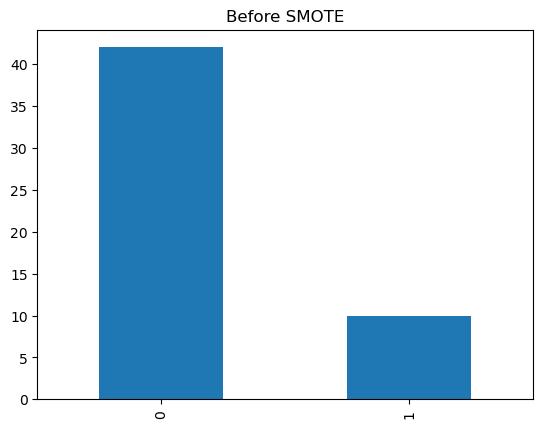

In [197]:
y_train.value_counts().plot(kind='bar', title="Before SMOTE")

<AxesSubplot:title={'center':'After SMOTE'}>

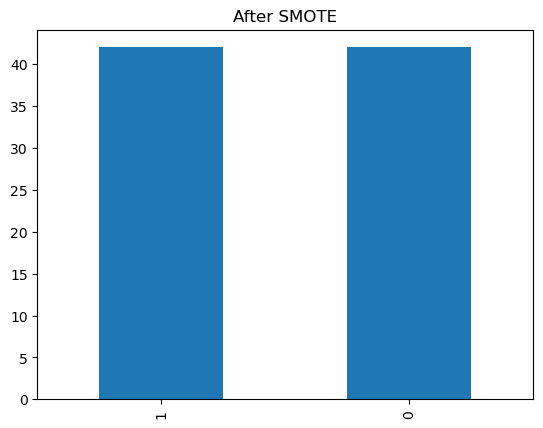

In [198]:
y_train_res.value_counts().plot(kind='bar', title="After SMOTE")

# Train Model

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier

# Train

#instantiate the model
clf = LogisticRegression()
# clf = svm.SVC()
# clf = RandomForestClassifier()

# Fit Model

In [200]:
#fit the model using the training data
clf.fit(X_train_res,y_train_res)

LogisticRegression()

# Predict

In [201]:
# Predict

#use model to make predictions on test data
y_pred = clf.predict(normalized_test_X)

# Score

In [202]:
# Score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  3],
       [ 1,  3]], dtype=int64)

In [203]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778
